# Classifying handwritten digits with MNIST

MNIST is a dataset of handwritten digits. It often acts as Hello World for Deep learning! We will develop a cool model. 

- The steps will be (roughly same as the previous notebook, and in ML-part of course)):
    - Load the data
    - Prepare the data
    - Build the model
    - Train the model
    - Evaluate the model
    - Save the model

In [64]:
# Import libraries
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

In [65]:
# Load the MNIST dataset

(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [66]:
# Vi printar första bilden, vi kan se att det mest är svarta pixlar (nollor),
# men en del som har färg. 

x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [67]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [68]:
# Kika på datasetet, se hur många labels av varje sort
# Datasetet är rätt jämnt mellan alla siffror

unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


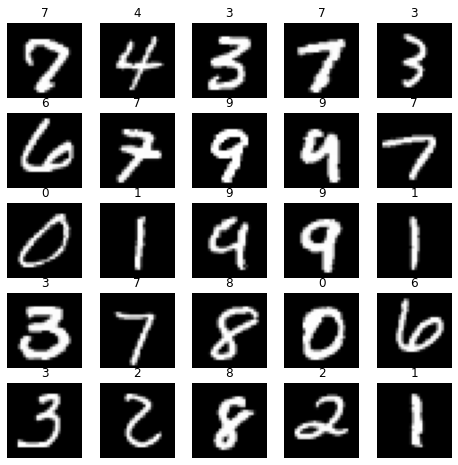

<Figure size 432x288 with 0 Axes>

In [69]:
# Plot some digits
# Looks good! 

import matplotlib.pyplot as plt

indexes = np.random.randint(0, x_train.shape[0],size=25)
images = x_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(8,8), facecolor='w')
for i in range(len(indexes)):
    plt.subplot(5,5,i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(labels[i])

plt.show()
plt.savefig('mnist-samples.png')


In [70]:
# Inspekterar labels, inser att vi måste one-hot-encodea dem
labels

array([7, 4, 3, 7, 3, 6, 7, 9, 9, 7, 0, 1, 9, 9, 1, 3, 7, 8, 0, 6, 3, 2,
       8, 2, 1], dtype=uint8)

In [71]:
print(y_train.shape)
print(y_train[0])

(60000,)
5


In [72]:
# One-hot encoding
# Transformerar labels från [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
# till [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] etc.

from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [73]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [74]:
x_train.shape

(60000, 28, 28)

In [75]:
# Transform image to tensor

image_size = x_train.shape[1]
input_size = image_size * image_size # 28 * 28 = 784

# Resizing and normalize

x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype(np.float32) / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype(np.float32) / 255

In [76]:
x_train.shape

(60000, 784)

In [77]:
# Create our model

model = Sequential()
model.add (Dense (256, input_dim = 784, activation="relu"))
model.add (Dense (128, activation="relu"))
model.add (Dense (10, activation="softmax"))

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
# Inspect the model visually

from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [80]:
# Compile the model 

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [82]:
# Train our model

history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3059 - accuracy: 0.9134 - val_loss: 0.1426 - val_accuracy: 0.9592
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1159 - accuracy: 0.9647 - val_loss: 0.1093 - val_accuracy: 0.9662
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0767 - accuracy: 0.9764 - val_loss: 0.0939 - val_accuracy: 0.9720
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0537 - accuracy: 0.9836 - val_loss: 0.0891 - val_accuracy: 0.9733
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0872 - val_accuracy: 0.9756
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0903 - val_accuracy: 0.9758
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.1019 - val_accuracy: 0.9727
Epoch 

In [83]:
# Evaluate the model

loss, acc = model.evaluate(x_test, y_test, batch_size = 128)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 3ms/step - loss: 0.1016 - accuracy: 0.9803

Test accuracy: 98.0%


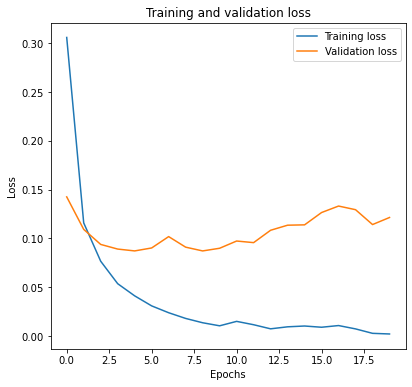

In [84]:
# The model is seriously overfitting the training data.
plt.figure(figsize=(14,6), facecolor='w')

# Plot the training loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [85]:
# Create our second model. We add regularization to minimize overfitting

from keras.regularizers import l2

modelR = Sequential()
modelR.add (Dense (256, input_dim = 784, activation="relu", kernel_regularizer=l2(0.01)))
modelR.add (Dense (128, activation="relu"))
modelR.add (Dense (10, activation="softmax"))

# Compile the model 

modelR.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

# Train the model
historyR = modelR.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.9002 - accuracy: 0.8977 - val_loss: 0.3485 - val_accuracy: 0.9382
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3135 - accuracy: 0.9435 - val_loss: 0.2715 - val_accuracy: 0.9562
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.2784 - accuracy: 0.9505 - val_loss: 0.2470 - val_accuracy: 0.9593
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2520 - accuracy: 0.9568 - val_loss: 0.2320 - val_accuracy: 0.9615
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2339 - accuracy: 0.9612 - val_loss: 0.2296 - val_accuracy: 0.9634
Epoch 6/20
375/375 [==============================] - 3s 8ms/step - loss: 0.2248 - accuracy: 0.9630 - val_loss: 0.2158 - val_accuracy: 0.9662
Epoch 7/20
375/375 [==============================] - 3s 8ms/step - loss: 0.2162 - accuracy: 0.9647 - val_loss: 0.2208 - val_accuracy: 0.9630
Epoch 

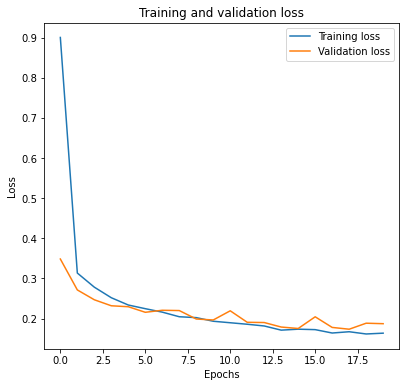

In [86]:
#Overfitting fixed

plt.figure(figsize=(14,6), facecolor='w')

# Plot the training loss
plt.subplot(1,2,1)
plt.plot(historyR.history['loss'], label='Training loss')
plt.plot(historyR.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
